# Illustrations for Isolation Forest algorithm

In [1]:
import json

import numpy as np
import pandas as pd

from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

In [3]:
BASE_COLOR = config['base_color']
LIGHT_COLOR = config['light_color']
DPI = config['dpi']
EDGE_COLOR = config['edge_color']
AXIS_COLOR = config['axis_color']
GRID_COLOR = config['grid_color']
FORMAT = config['format']

In [4]:
palette = f"blend:{BASE_COLOR},{LIGHT_COLOR}"

In [5]:
rc = {'axes.edgecolor': AXIS_COLOR,
      'axes.labelcolor': AXIS_COLOR,
      'grid.linestyle': '--',
      'text.color': AXIS_COLOR,
      'xtick.color': AXIS_COLOR,
      'ytick.color': AXIS_COLOR,
      'grid.color': GRID_COLOR}

In [6]:
sns.set(font_scale=2)
sns.set_style("whitegrid", rc=rc)
sns.set_context("talk")

In [7]:
np.random.seed(42)

In [8]:
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

In [9]:
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

In [10]:
offset = 3

In [11]:
X1 = 0.5 * np.random.randn(n_inliers) + offset
X2 = 0.5 * np.random.randn(n_inliers) - offset

In [12]:
outliers_1 = np.random.uniform(low=-6, high=6, size=(n_outliers))
outliers_2 = np.random.uniform(low=-6, high=6, size=(n_outliers))

In [13]:
data = pd.concat([pd.DataFrame({'попугаи': X1, 'удавы': X2}), 
                  pd.DataFrame({'попугаи': outliers_1, 'удавы': outliers_2})])

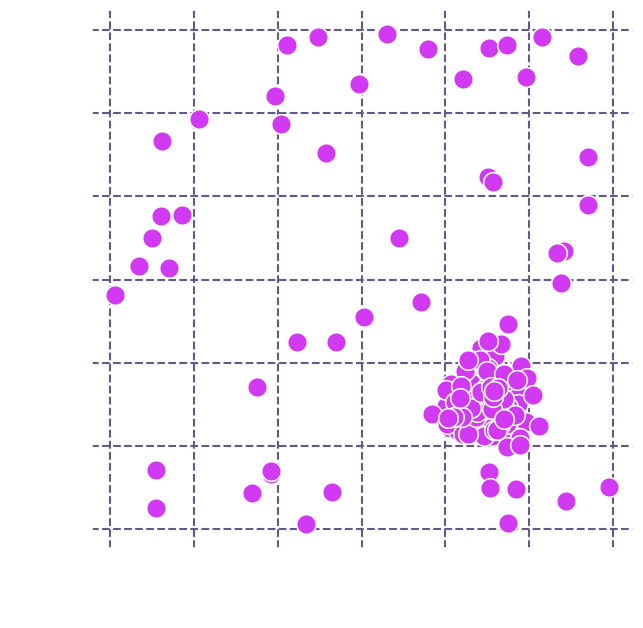

In [14]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
plt.savefig(f"images/iforest_initial_data.{FORMAT}", transparent=True, dpi=DPI)

In [15]:
sample = data.sample(70, random_state=42).copy()

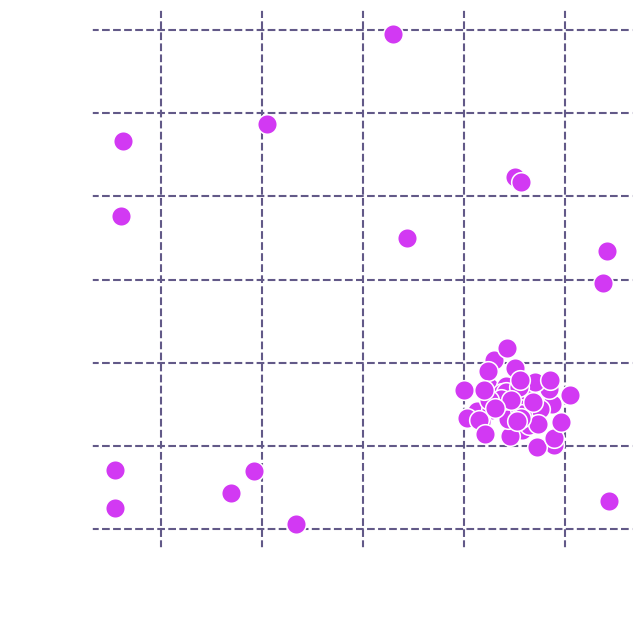

In [16]:
plt.figure(figsize=(7, 7))
sns.scatterplot(sample, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
plt.savefig(f"images/iforest_sample.{FORMAT}", transparent=True, dpi=DPI)

In [17]:
first_split = 3.954197818641566
second_split = -3.7345546743319455
third_split = 4.55352143693694
forth_split = -0.6572094533790986

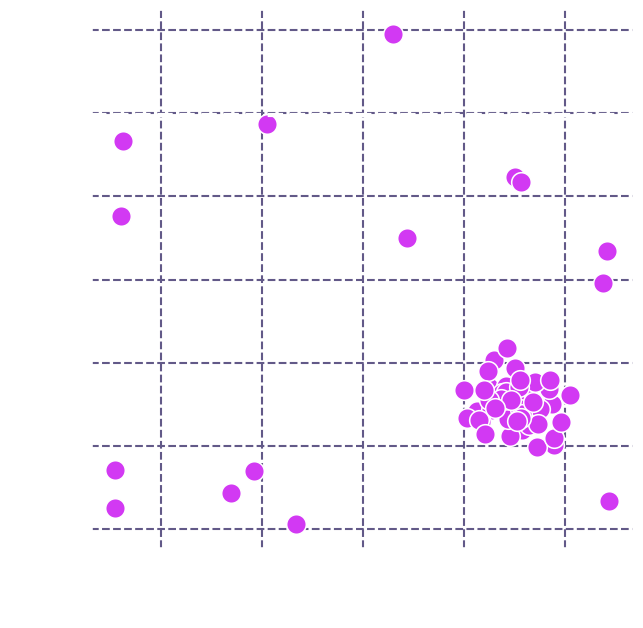

In [18]:
plt.figure(figsize=(7, 7))
sns.scatterplot(sample, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
plt.axhline(first_split, linestyle='--', color=AXIS_COLOR, linewidth=3)
plt.savefig(f"images/iforest_first_split.{FORMAT}", transparent=True, dpi=DPI)

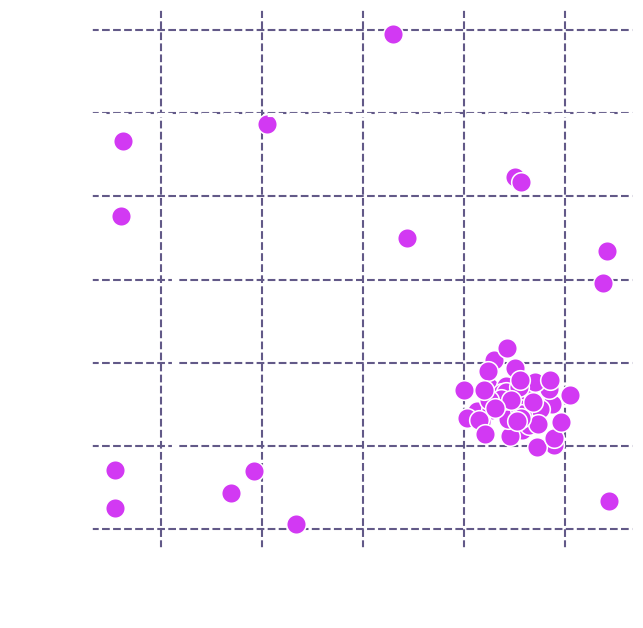

In [19]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(sample, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
bounds = ax.viewLim.bounds
plt.axhline(first_split, linestyle='--', color=AXIS_COLOR, linewidth=3)
plt.axvline(x=second_split, ymin = 0.0, ymax = - (bounds[1] -  first_split) / bounds[3], linestyle='--', color=AXIS_COLOR, linewidth=3)
plt.savefig(f"images/iforest_second_split.{FORMAT}", transparent=True, dpi=DPI)

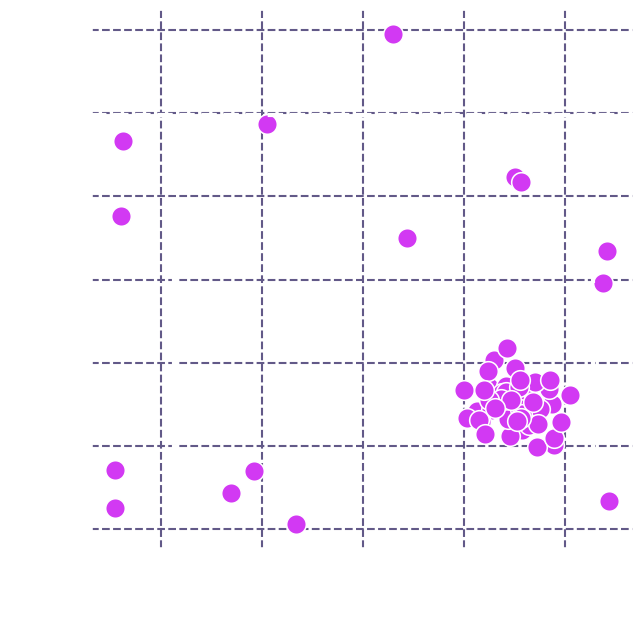

In [20]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(sample, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
bounds = ax.viewLim.bounds
first_splot_pos = - (bounds[1] -  first_split) / bounds[3]
plt.axhline(first_split, linestyle='--', color=AXIS_COLOR, linewidth=3)
plt.axvline(x=second_split, ymin = 0.0, ymax = first_splot_pos, linestyle='--', color=AXIS_COLOR, linewidth=3)
plt.axvline(x=third_split, ymin = 0., ymax = first_splot_pos, linestyle='--', color=AXIS_COLOR, linewidth=3)
plt.savefig(f"images/iforest_third_split.{FORMAT}", transparent=True, dpi=DPI)

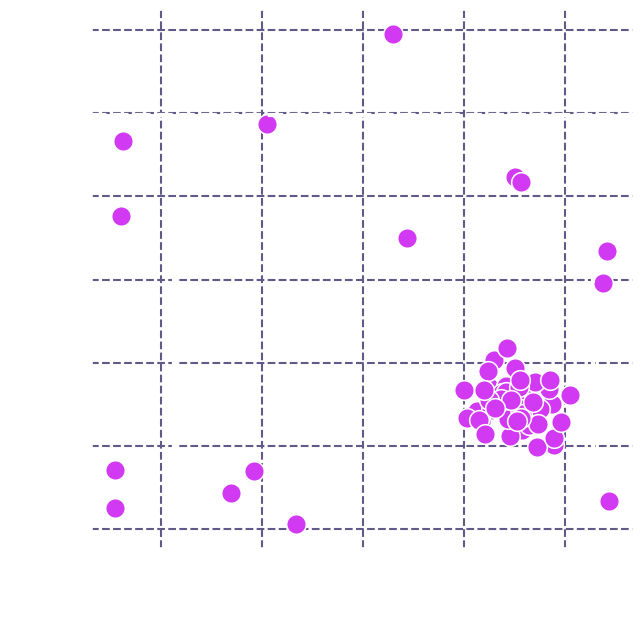

In [21]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(sample, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
bounds = ax.viewLim.bounds
first_splot_pos = - (bounds[1] -  first_split) / bounds[3]
second_split_pos = abs(second_split - bounds[0]) / bounds[2]
plt.axhline(first_split, linestyle='--', color=AXIS_COLOR, linewidth=3)
plt.axvline(x=second_split, ymin = 0.0, ymax = first_splot_pos, linestyle='--', color=AXIS_COLOR, linewidth=3)
plt.axvline(x=third_split, ymin = 0., ymax = first_splot_pos, linestyle='--', color=AXIS_COLOR, linewidth=3)
plt.axhline(y=forth_split, xmin=0., xmax=second_split_pos, linestyle='--', color=AXIS_COLOR, linewidth=3)
plt.savefig(f"images/iforest_forth_split.{FORMAT}", transparent=True, dpi=DPI)

In [22]:
clf = IsolationForest(random_state=0)

In [23]:
clf.fit(data)

IsolationForest(random_state=0)

In [24]:
scores = - clf.score_samples(data) # negative scores to get anomaly score as in pyOD

In [25]:
reverse_palette = f"blend:{'white'},{'white'}"

In [26]:
def create_alpha_cmap(cmap, alpha_range=(0.2, 0.8)):
    """Создает colormap с изменяющейся прозрачностью"""
    # Получаем цвета из исходной cmap
    colors = cmap(np.linspace(0, 1, 256))
    
    # Меняем альфа-канал в зависимости от положения в cmap
    alphas = np.linspace(alpha_range[0], alpha_range[1], 256)
    colors[:, -1] = alphas  # Устанавливаем альфа-канал
    
    return mcolors.ListedColormap(colors)

In [27]:
original_cmap = sns.color_palette(reverse_palette, as_cmap=True)
alpha_cmap = create_alpha_cmap(original_cmap, alpha_range=(0.01, 0.9))

/home/michael/git/phd-2025-anomaly-detection/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


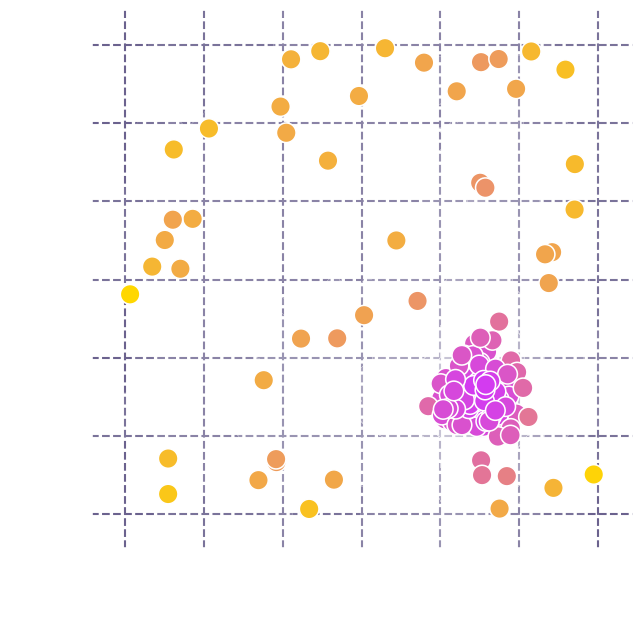

In [28]:
plt.figure(figsize=(7, 7))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    data.values,
    plot_method='contourf',
    response_method="decision_function",
    alpha=None,
    ax=ax,
    cmap=alpha_cmap
)
sns.scatterplot(data, x='попугаи', y='удавы', s=200, ax=ax, hue=scores, 
                palette=sns.color_palette(palette, as_cmap=True), legend=False, edgecolor=EDGE_COLOR)
plt.savefig(f"images/iforest_decision_boundary.{FORMAT}", transparent=True, dpi=DPI)

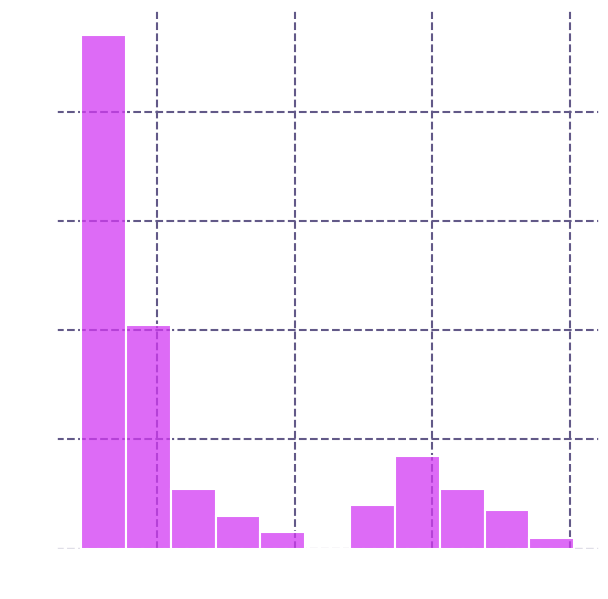

In [29]:
plt.figure(figsize=(7, 7))
ax = sns.histplot(scores, color=BASE_COLOR, edgecolor=EDGE_COLOR)
ax.set(ylabel='')
plt.savefig(f"images/iforest_score_histogram.{FORMAT}", transparent=True, dpi=DPI)